# Words per Prediction

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/preprocessed_train.csv')
print(df.head(5))

       Id  Prediction                        Summary  \
0  492346           5             just what i needed   
1  343811           5         most excellent oatmeal   
2  347257           4                    quality tea   
3  225529           5  great coffee at a great price   
4  485488           4       popchips jalapeno flavor   

                                                Text  
0  i got them in a very timely manner and theyre ...  
1  mccanns steel cut oatmeal is the perfect break...  
2  i would recommend it quality pearls and a few ...  
3  i have to admit i first purchased these hazeln...  
4  i bought a case of jalapeno chips as i love th...  


In [3]:
def text_per_prediction(df):
    #df['Text'] = df['Summary'] + ' ' + df['Text']
    return df.groupby('Prediction')['Text'].apply(lambda x: ' '.join(x)).reset_index()

In [4]:
df = text_per_prediction(df)
print(df.head(5))

   Prediction                                               Text
0           1  check out the sugar content before you buy   g...
1           2  like the product but come on   for a little cr...
2           3  maybe its due to my tendency to prefer noodles...
3           4  i would recommend it quality pearls and a few ...
4           5  i got them in a very timely manner and theyre ...


---

# Word dictionary

In [41]:
for i, row in text_per_prediction.iterrows():
    preds[row['Prediction']] = {}
    for word in row['Text'].split():
        preds[row['Prediction']][word] = preds[row['Prediction']].get(word, 0) + 1

In [43]:
print(preds[1])

{'forcebr': 1, 'woodi': 18, 'pinbon': 3, 'nalley': 3, 'suzann': 15, 'bromelain': 1, 'zotz': 1, 'scold': 2, 'antidandruff': 1, 'actionbr': 1, 'labelwa': 1, 'eversav': 1, 'butwhat': 8, 'pigment': 6, 'backmight': 1, 'hippiefood': 3, 'strictest': 1, 'jokingbr': 1, 'viewabl': 3, 'foamyconsist': 1, 'wooden': 12, 'tcbr': 1, 'wednesday': 14, 'chefbr': 1, 'liquidmilk': 1, 'crotch': 2, 'ommiss': 1, 'cherrio': 1, 'tumer': 6, 'gasyou': 1, 'frederick': 1, 'hador': 1, 'sooth': 18, 'poucheswhich': 1, 'warehousetyp': 1, 'dialogu': 1, 'coffeewil': 1, 'jumbledbut': 1, 'entercrappris': 1, 'succumb': 4, 'lekitho': 3, 'eruc': 61, 'cakebal': 1, 'doesskippi': 1, 'sovena': 2, 'fillerjunk': 1, 'china': 1610, 'wagyu': 4, 'bergomot': 1, 'deterior': 22, 'naturel': 2, 'kidz': 2, 'spotti': 3, 'remotli': 1, 'everon': 2, 'controversi': 40, 'golden': 134, 'kethcup': 1, 'kelloggbr': 1, 'elgibl': 1, 'orangish': 2, 'milletbr': 1, 'chcolat': 1, 'stern': 2, 'constuct': 1, 'wallymart': 1, 'dna': 26, 'bergamont': 1, 'subscri

---

# Word cloud

In [15]:
from wordcloud import WordCloud

In [16]:
# Generate a word cloud image for prediction 1
wordcloud = WordCloud().generate(df.Text[0])

### Minimal cloud

In [17]:
# Display the generated image:
# the Pillow way:
image = wordcloud.to_image()
image.show()

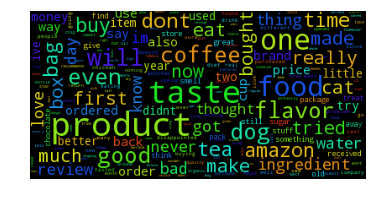

In [21]:
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

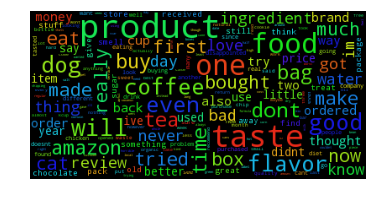

In [22]:
# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(df.Text[0])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Masked cloud

In [28]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [29]:
one_mask = np.array(Image.open("masks/one.jpg"))
stopwords = set(STOPWORDS)
masked_wordcloud = WordCloud(background_color="white", max_words=2000, mask=one_mask, stopwords=stopwords)

In [30]:
masked_wordcloud.generate(df.Text[0])

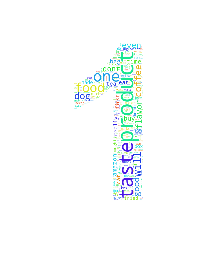

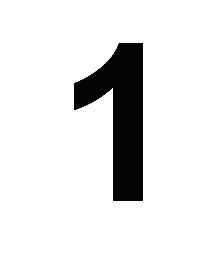

In [38]:
# Display
plt.imshow(masked_wordcloud)
plt.axis("off")
plt.figure()
plt.imshow(one_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()